**Import Library**

In [1]:
import cv2
import dlib
import numpy as np
from keras.models import load_model

In [2]:
import cv2
import dlib
import numpy as np
import pandas as pd
from scipy.spatial import distance as dist
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold

**Clip Video to the same Length**

In [ ]:
from moviepy.video.io.VideoFileClip import VideoFileClip
# Define the paths to the input and output video files
input_video_path = '/content/drive/MyDrive/Colab Notebooks/chalachew_non_drawsy.mp4'
output_video_path = '//content/drive/MyDrive/Colab Notebooks/non_drawsy.mp4'
# Define the desired duration of the output video (in seconds)
output_duration = 11

# Load the input video clip
clip = VideoFileClip(input_video_path)

# Trim the clip to the desired duration
trimmed_clip = clip.subclip(0, output_duration)

# Write the trimmed clip to a new video file
trimmed_clip.write_videofile(output_video_path, codec='libx264')

**Pretrained Model**

In [3]:
# Load face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/shape_predictor_68_face_landmarks.dat")

Function to calculate EAR

In [4]:
def calculate_ear(eye):
    # Compute the vertical distances between the eye landmarks
    v1 = dist.euclidean(eye[1], eye[5])
    v2 = dist.euclidean(eye[2], eye[4])
    # Compute the horizontal distance between the eye landmarks
    h = dist.euclidean(eye[0], eye[3])
    # Compute the eye aspect ratio (EAR)
    ear = (v1 + v2) / (2.0 * h)
    return ear

Drawsy Video

In [5]:
import cv2
import numpy as np
# Define the path to the video file
drowsy = '/content/drive/MyDrive/Colab Notebooks/non_drawsy.mp4'
# Open the video file
cap = cv2.VideoCapture(drowsy)
# Define the interval for sampling frames (in seconds)
frame_interval = 2
# Initialize the frame counter
frame_count = 0
# Initialize the list of frames and labels
frames = []
labels = []
ear_values = []

# Define the kernel size for the Gaussian blur
kernel_size = 5
# Loop through the video frames
while True:
    # Read the next frame from the video
    ret, frame = cap.read()
    if not ret:
        break
    # Increment the frame counter
    frame_count += 1
    # Sample frames at the specified interval
    if frame_count % int(frame_interval * cap.get(cv2.CAP_PROP_FPS)) == 0:
        # Convert the frame to grayscale and resize it to 24x24
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur to reduce noise
        gray = cv2.medianBlur(gray, kernel_size)

        # Detect the faces in the frame haar cascade classifier
        faces = detector(gray, 0)

        # Loop through the faces and locate the eye landmarks
        for face in faces:
            landmarks = predictor(gray, face)
            left_eye = np.array([(landmarks.part(36).x, landmarks.part(36).y),
                                 (landmarks.part(37).x, landmarks.part(37).y),
                                 (landmarks.part(38).x, landmarks.part(38).y),
                                 (landmarks.part(39).x, landmarks.part(39).y),
                                 (landmarks.part(40).x, landmarks.part(40).y),
                                 (landmarks.part(41).x, landmarks.part(41).y)], dtype=np.float32)
            right_eye = np.array([(landmarks.part(42).x, landmarks.part(42).y),
                                  (landmarks.part(43).x, landmarks.part(43).y),
                                  (landmarks.part(44).x, landmarks.part(44).y),
                                  (landmarks.part(45).x, landmarks.part(45).y),
                                  (landmarks.part(46).x, landmarks.part(46).y),
                                  (landmarks.part(47).x, landmarks.part(47).y)], dtype=np.float32)
            # Calculate the EAR for each eye
            left_ear = calculate_ear(left_eye)
            right_ear = calculate_ear(right_eye)
            ear = (left_ear + right_ear) / 2.0

            # Append the frame, label, and EAR value to the lists
            frames.append(cv2.resize(gray, (24, 24)))
            label = 0 if ear < 0.25 else 1
            labels.append(label)  # or 1 for drowsy frames
            ear_values.append(ear)
            
            print("ear = ",ear)
            # Crop the face region from the frame
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            face_region = gray[y:y+h, x:x+w]

            # Save the face region as an image file
            filename = f'drowsy_{frame_count}.jpg'
            cv2.imwrite(filename, cv2.resize(face_region, (200, 200)))
print(labels)
# Release the video capture object
cap.release()

ear =  0.30907869477766936
ear =  0.2881192426617409
ear =  0.2909122139824749
ear =  0.27407877986727747
ear =  0.24948289718253563
[1, 1, 1, 1, 0]


Non Drowsy Video

In [6]:
# Define the path to the video file
non_drowsy = '/content/drive/MyDrive/Colab Notebooks/detect.mp4'
# Open the video file
cap = cv2.VideoCapture(non_drowsy)
# Initialize the frame counter
frame_count = 0
# Initialize the list of frames and labels
# Loop through the video frames
while True:
    # Read the next frame from the video
    ret, frame = cap.read()
    if not ret:
        break
    # Increment the frame counter
    frame_count += 1
    # Sample frames at the specified interval
    if frame_count % int(frame_interval * cap.get(cv2.CAP_PROP_FPS)) == 0:
        # Convert the frame to grayscale and resize it to 24x24
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Detect the faces in the frame
        gray = cv2.GaussianBlur(gray, (5, 5), 0)
        faces = detector(gray, 0)

        # Loop through the faces and locate the eye landmarks
        for face in faces:
            landmarks = predictor(gray, face)
            left_eye = np.array([(landmarks.part(36).x, landmarks.part(36).y),
                                 (landmarks.part(37).x, landmarks.part(37).y),
                                 (landmarks.part(38).x, landmarks.part(38).y),
                                 (landmarks.part(39).x, landmarks.part(39).y),
                                 (landmarks.part(40).x, landmarks.part(40).y),
                                 (landmarks.part(41).x, landmarks.part(41).y)], dtype=np.float32)
            right_eye = np.array([(landmarks.part(42).x, landmarks.part(42).y),
                                  (landmarks.part(43).x, landmarks.part(43).y),
                                  (landmarks.part(44).x, landmarks.part(44).y),
                                  (landmarks.part(45).x, landmarks.part(45).y),
                                  (landmarks.part(46).x, landmarks.part(46).y),
                                  (landmarks.part(47).x, landmarks.part(47).y)], dtype=np.float32)
            # Calculate the EAR for each eye
            left_ear = calculate_ear(left_eye)
            right_ear = calculate_ear(right_eye)
            ear = (left_ear + right_ear) / 2.0

            # Append the frame, label, and EAR value to the lists
            frames.append(cv2.resize(gray, (24, 24)))
            label = 0 if ear < 0.25 else 1
            labels.append(label)  # or 1 for drowsy frames
            ear_values.append(ear)

            # Crop the face region from the frame
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            face_region = gray[y:y+h, x:x+w]

            # Save the face region as an image file
            filename = f'non_drowsy_{frame_count}.jpg'
            cv2.imwrite(filename, cv2.resize(face_region, (200, 200)))       
# Release the video capture object
cap.release() 

**Train Test Split**

In [68]:
# Convert the list of frames and labels to NumPy arrays
X = np.array(frames).reshape(-1, 24, 24, 1)
y = np.array(labels)
# Normalize the input data
X = X / 255.0
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(9, 24, 24, 1)
(3, 24, 24, 1)
(1, 24, 24, 1)


CNN Model Training

In [69]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(24, 24, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model on your dataset
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))
# Save the trained model
model.save('drowsiness_detection_model.h5')

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.7098 - accuracy: 0.4444 - val_loss: 0.6818 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 70ms/step - loss: 0.6622 - accuracy: 0.8889 - val_loss: 0.6735 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 47ms/step - loss: 0.6388 - accuracy: 0.8889 - val_loss: 0.6613 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 65ms/step - loss: 0.6454 - accuracy: 0.8889 - val_loss: 0.6560 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 56ms/step - loss: 0.6574 - accuracy: 0.7778 - val_loss: 0.6484 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 67ms/step - loss: 0.6738 - accuracy: 0.6667 - val_loss: 0.6314 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 51ms/step - loss: 0.5593 - accuracy: 0.8889 - val_loss: 0.6093 - val_accuracy: 1.0000
Epoch 8/50
1/1 [=============

In [70]:
model = load_model('drowsiness_detection_model.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

1/1 [==============================] - 0s 165ms/step - loss: 4.7866 - accuracy: 0.6667
Accuracy: 0.6666666865348816


Model Loss and Accuracy

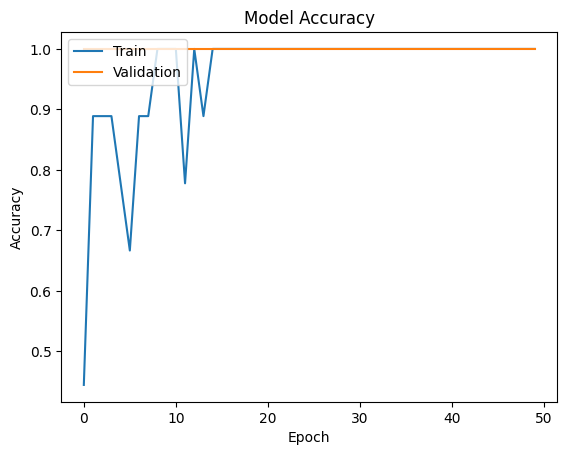

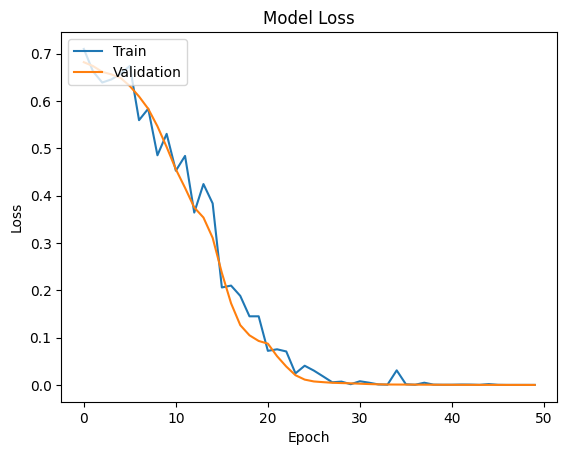

In [71]:
# Plot the training and validation accuracy over the epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

SVM Model Trainning

In [ ]:
X = np.array(ear_values)
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC(kernel="linear", C=0.1, probability=True)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
clf.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [ ]:
# Test the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 50.00%


In [ ]:
import cv2
import dlib
import numpy as np
from scipy.spatial import distance as dist
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:

# Function to calculate EAR
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear


In [ ]:
# Load face detector and landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/shape_predictor_68_face_landmarks.dat")


In [ ]:
# Collect and preprocess data
data = []
labels = []
cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/non_drawsy.mp4")
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray, 0)
    for face in faces:
        landmarks = predictor(gray, face)
        left_eye = []
        right_eye = []
        for n in range(36, 42):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            left_eye.append((x, y))
        for n in range(42, 48):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            right_eye.append((x, y))
        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        ear = (left_ear + right_ear) / 2.0
        data.append([ear])
        label = 0 if ear < 0.25 else 1
        labels.append(label)
        print(labels)

[1]
[1, 1]
[1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=min(0.1, 1./len(data)), random_state=42)
clf = SVC(kernel="linear", C=0.1, probability=True)
clf.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [ ]:
# Test the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


In [ ]:
# Train and evaluate classifier using 5-fold cross-validation
clf = SVC(kernel="linear", C=0.1, probability=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, data, labels, cv=cv)
print("Accuracy:", np.mean(scores))

Accuracy: 0.9212121212121211


In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
y_pred = cross_val_predict(clf, data, labels, cv=cv)
accuracy = accuracy_score(labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6106870229007634


In [ ]:
# Compute confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(labels, y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[160   0]
 [102   0]]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
target_names = ["Not Drowsy", "Drowsy"]
report = classification_report(labels, y_pred, target_names=target_names, zero_division=1)
print("Classification report:")
print(report)

Classification report:
              precision    recall  f1-score   support

  Not Drowsy       0.61      1.00      0.76       160
      Drowsy       1.00      0.00      0.00       102

    accuracy                           0.61       262
   macro avg       0.81      0.50      0.38       262
weighted avg       0.76      0.61      0.46       262



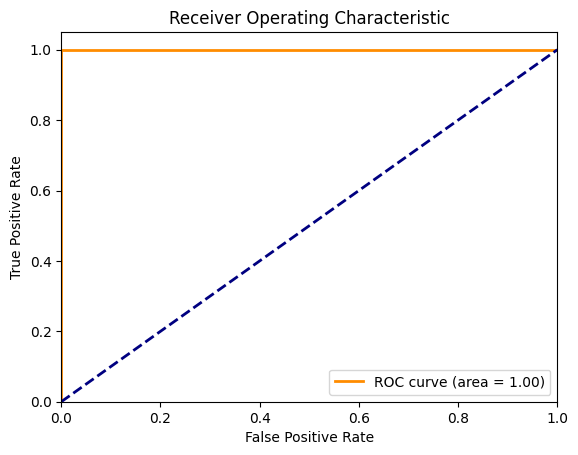

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_prob = cross_val_predict(clf, data, labels, cv=cv, method="predict_proba")
y_scores = y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(labels, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

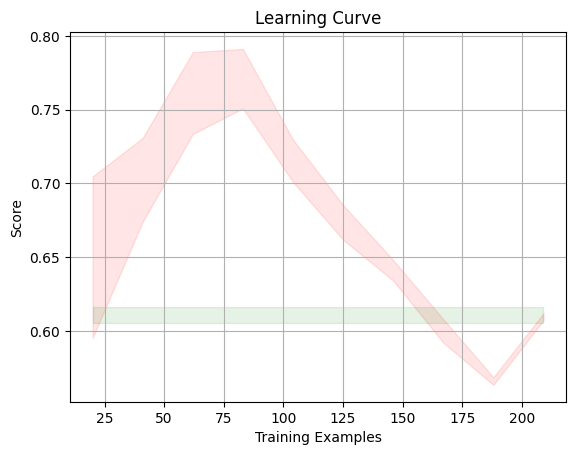

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf, data, labels, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
# Calculate mean and standard deviation of train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1,
                  color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="g")

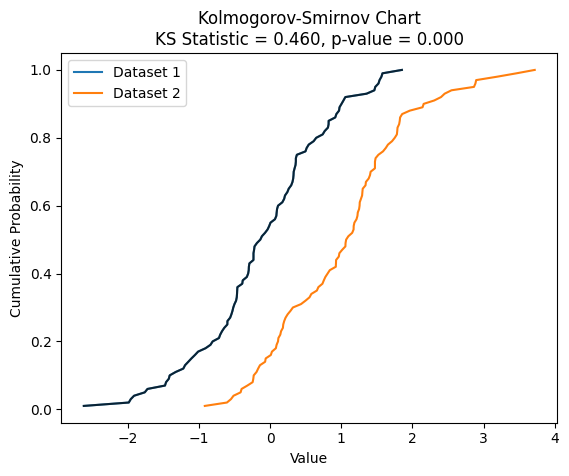

In [ ]:
import numpy as np
from scipy.stats import norm, ks_2samp
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate two random datasets
np.random.seed(42)
data1 = np.random.normal(loc=0, scale=1, size=100)
data2 = np.random.normal(loc=1, scale=1, size=100)

# Compute ECDF for each dataset
ecdf1 = sm.distributions.ECDF(data1)
ecdf2 = sm.distributions.ECDF(data2)

# Compute KS statistic and p-value
ks_stat, p_value = ks_2samp(data1, data2)

# Plot KS chart
plt.plot(ecdf1.x, ecdf1.y, label="Dataset 1")
plt.plot(ecdf2.x, ecdf2.y, label="Dataset 2")
plt.plot([ecdf1.x[np.argmax(ecdf1.y >= ecdf2.y[i])] for i in range(len(ecdf2.y))],
         ecdf2.y, 'k-', lw=1.5, alpha=0.7)
plt.legend(loc="best")
plt.title("Kolmogorov-Smirnov Chart\nKS Statistic = {:.3f}, p-value = {:.3f}".format(ks_stat, p_value))
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.show()